# Free your mind! 

* We have choosen to study the different age in all five main Europe championships (premier league- liga - serie a - bundesliga - ligue 1). This study has been done for all players and for different role. The results were shown with differents barplot.



In [58]:
import json 
from datetime import date
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
from pandas.io.json import json_normalize #package for flattening json in pandas df



# Import data

In [59]:
#load teams.json in df_teams dataframe
with open('/Users/digitalfirst/Desktop/homework_dataFrame/teams.json') as f:
    teams = json.load(f)
df_teams = json_normalize(teams)

#load players.json on a 'palers' dataframe
with open('/Users/digitalfirst/Desktop/homework_dataFrame/players.json') as f:
    d = json.load(f)
players = json_normalize(d)

In [60]:
#filter for club teams 
df_teams_club=df_teams.loc[(df_teams["type"] == "club")]
#filter for different nation and put teams for every nation
df_teams_england=df_teams_club.loc[(df_teams_club["area.name"] == "England")]
df_teams_italy=df_teams_club.loc[(df_teams_club["area.name"] == "Italy")]
df_teams_spain=df_teams_club.loc[(df_teams_club["area.name"] == "Spain")]
df_teams_germany=df_teams_club.loc[(df_teams_club["area.name"] == "Germany")]
df_teams_france=df_teams_club.loc[(df_teams_club["area.name"] == "France")]

df_teams_italy.head(6)

,area.alpha2code,area.alpha3code,area.id,area.name,city,name,officialName,type,wyId
18,IT,ITA,380,Italy,Ferrara,SPAL,Societ\u00e0 Polisportiva Ars et Labor 2013,club,3204
34,IT,ITA,380,Italy,Milano,Milan,AC Milan,club,3157
36,IT,ITA,380,Italy,Torino,Juventus,Juventus FC,club,3159
37,IT,ITA,380,Italy,Roma,Roma,AS Roma,club,3158
38,IT,ITA,380,Italy,Sassuolo,Sassuolo,US Sassuolo Calcio,club,3315
47,IT,ITA,380,Italy,Bologna,Bologna,Bologna FC 1909,club,3166


We used this function to calculate age from year of birth

In [61]:
#this a function that calucate age from a born year that we have in input
def calculate_age(born):
    today = date.today()
    year, month, day = [int(f) for f in born.split('-')]
    return today.year - year - ((today.month, today.day) < (month, day))

In [62]:


#calculate age for every players and put it in a new column in a new row
players = players[['currentTeamId','wyId','role.name','shortName', 'birthDate']]
players["age"] = players.apply(lambda x: calculate_age(x['birthDate']), axis=1)

players.head(6)



,currentTeamId,wyId,role.name,shortName,birthDate,age
0,4502,32777,Goalkeeper,H. Tekin,1989-06-17,30
1,3775,393228,Defender,M. Sarr,1999-01-23,20
2,3772,393230,Goalkeeper,O. Mandanda,1998-10-26,21
3,683,32793,Midfielder,A. N'Diaye,1990-03-06,29
4,2975,393247,Defender,I. Konat\u00e9,1999-05-25,20
5,676,33,Goalkeeper,J. Cillessen,1989-04-22,30


In [63]:
#filter data on players for differents role (goalkeepers, defedner, mdifielder, forward)
goalkeepers=players.loc[players['role.name'] == "Goalkeeper"]
defender=players.loc[players['role.name'] == "Defender"]
midfielder=players.loc[players['role.name'] == "Midfielder"]
forward=players.loc[players['role.name'] == "Forward"]

We calculated average age for every championship

In [64]:
mean=[]
meand_gk=[]
mean_defender=[]
mean_midfieldr=[]
mean_forward=[]
championship= ["Premier league", "Liga", "Serie A", "Bundesliga","Ligue 1"]


df_merge = pd.merge(players,df_teams_england,left_on='currentTeamId', right_on='wyId')
Mean_age_england = df_merge["age"].mean()
mean.append(Mean_age_england)

df_merge = pd.merge(players,df_teams_spain,left_on='currentTeamId', right_on='wyId')
Mean_age_spain = df_merge["age"].mean()
mean.append(Mean_age_spain)

df_merge = pd.merge(players,df_teams_italy,left_on='currentTeamId', right_on='wyId')
Mean_age_italy = df_merge["age"].mean()
mean.append(Mean_age_italy)

df_merge = pd.merge(players,df_teams_germany,left_on='currentTeamId', right_on='wyId')
Mean_age_germany = df_merge["age"].mean()
mean.append(Mean_age_germany)

df_merge = pd.merge(players,df_teams_france,left_on='currentTeamId', right_on='wyId')
Mean_age_france = df_merge["age"].mean()
mean.append(Mean_age_france)





We calculated average age for goalkeepers role

In [65]:
df_merge_gk = pd.merge(goalkeepers,df_teams_england,left_on='currentTeamId', right_on='wyId')
Mean_age_england_gk = df_merge_gk["age"].mean()
meand_gk.append(Mean_age_england_gk)

df_merge_gk = pd.merge(goalkeepers,df_teams_spain,left_on='currentTeamId', right_on='wyId')
Mean_age_spain_gk = df_merge_gk["age"].mean()
meand_gk.append(Mean_age_spain_gk)

df_merge_gk = pd.merge(goalkeepers,df_teams_italy,left_on='currentTeamId', right_on='wyId')
Mean_age_italy_gk = df_merge_gk["age"].mean()
meand_gk.append(Mean_age_italy_gk)

df_merge_gk = pd.merge(goalkeepers,df_teams_germany,left_on='currentTeamId', right_on='wyId')
Mean_age_germany_gk = df_merge_gk["age"].mean()
meand_gk.append(Mean_age_germany_gk)

df_merge_gk = pd.merge(goalkeepers,df_teams_france,left_on='currentTeamId', right_on='wyId')
Mean_age_france_gk = df_merge_gk["age"].mean()
meand_gk.append(Mean_age_france_gk)







We calculated average age for defender role

In [66]:

df_merge_defender = pd.merge(defender,df_teams_england,left_on='currentTeamId', right_on='wyId')
Mean_age_england_defender = df_merge_defender["age"].mean()
mean_defender.append(Mean_age_england_defender)

df_merge_defender = pd.merge(defender,df_teams_spain,left_on='currentTeamId', right_on='wyId')
Mean_age_spain_defender = df_merge_defender["age"].mean()
mean_defender.append(Mean_age_spain_defender)

df_merge_defender = pd.merge(defender,df_teams_italy,left_on='currentTeamId', right_on='wyId')
Mean_age_italy_defender = df_merge_defender["age"].mean()
mean_defender.append(Mean_age_italy_defender)

df_merge_defender = pd.merge(defender,df_teams_germany,left_on='currentTeamId', right_on='wyId')
Mean_age_germany_defender = df_merge_defender["age"].mean()
mean_defender.append(Mean_age_germany_defender)

df_merge_defender = pd.merge(defender,df_teams_france,left_on='currentTeamId', right_on='wyId')
Mean_age_france_defender = df_merge_defender["age"].mean()
mean_defender.append(Mean_age_france_defender)







We calculated average age for midifielder role

In [67]:
df_merge_midfielder = pd.merge(midfielder,df_teams_england,left_on='currentTeamId', right_on='wyId')
Mean_age_england_midfielder = df_merge_midfielder["age"].mean()
mean_midfieldr.append(Mean_age_england_midfielder)

df_merge_midfielder = pd.merge(midfielder,df_teams_spain,left_on='currentTeamId', right_on='wyId')
Mean_age_spain_midfielder = df_merge_midfielder["age"].mean()
mean_midfieldr.append(Mean_age_spain_midfielder)

df_merge_midfielder = pd.merge(midfielder,df_teams_italy,left_on='currentTeamId', right_on='wyId')
Mean_age_italy_midfielder = df_merge_midfielder["age"].mean()
mean_midfieldr.append(Mean_age_italy_midfielder)

df_merge_midfielder = pd.merge(midfielder,df_teams_germany,left_on='currentTeamId', right_on='wyId')
Mean_age_germany_midfielder = df_merge_midfielder["age"].mean()
mean_midfieldr.append(Mean_age_germany_midfielder)

df_merge_midfielder = pd.merge(midfielder,df_teams_france,left_on='currentTeamId', right_on='wyId')
Mean_age_france_midfielder = df_merge_midfielder["age"].mean()
mean_midfieldr.append(Mean_age_france_midfielder)



We calculated average age for forward role

In [68]:
df_merge_forward = pd.merge(forward,df_teams_england,left_on='currentTeamId', right_on='wyId')
Mean_age_england_forward = df_merge_forward["age"].mean()
mean_forward.append(Mean_age_england_forward)

df_merge_forward = pd.merge(forward,df_teams_spain,left_on='currentTeamId', right_on='wyId')
Mean_age_spain_forward = df_merge_forward["age"].mean()
mean_forward.append(Mean_age_spain_forward)


df_merge_forward = pd.merge(forward,df_teams_italy,left_on='currentTeamId', right_on='wyId')
Mean_age_italy_forward = df_merge_forward["age"].mean()
mean_forward.append(Mean_age_italy_forward)

df_merge_forward = pd.merge(forward,df_teams_germany,left_on='currentTeamId', right_on='wyId')
Mean_age_germany_forward = df_merge_forward["age"].mean()
mean_forward.append(Mean_age_germany_forward)

df_merge_forward = pd.merge(forward,df_teams_france,left_on='currentTeamId', right_on='wyId')
Mean_age_england_forward = df_merge_forward["age"].mean()
mean_forward.append(Mean_age_england_forward)

In the following figre we have shown a bar plot that shows the difference between average age about all 5 diffrent championship in Europe that we have considered.

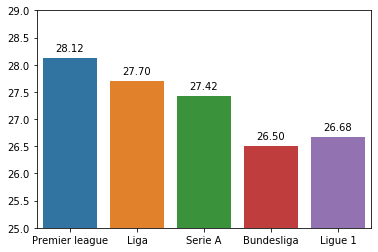

In [69]:
#total mean
ax = sns.barplot(x=championship, y=mean)
ax.set(ylim=(25, 29))
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')



In the following figre we have shown a bar plot that shows the difference between average age for goalkeepers about all 5 diffrent championship in Europe that we have considered.

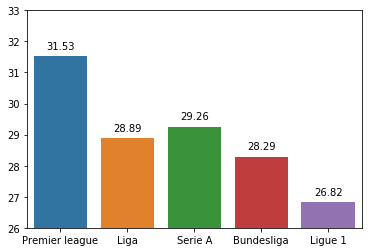

In [70]:
#mean by gk
ax = sns.barplot(x=championship, y=meand_gk)
ax.set(ylim=(26, 33))
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')



In the following figre we have shown a bar plot that shows the difference between average age for defenders about all 5 diffrent championship in Europe that we have considered.

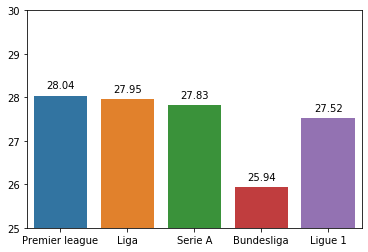

In [71]:
#mean by defender
ax = sns.barplot(x=championship, y=mean_defender)
ax.set(ylim=(25, 30))
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')



In the following figre we have shown a bar plot that shows the difference between average age for midfielders about all 5 diffrent championship in Europe that we have considered.

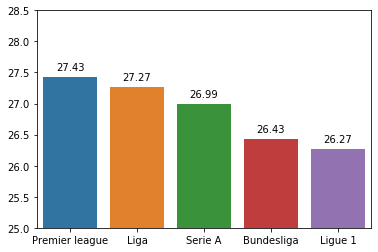

In [72]:
#mean by midfielder
ax = sns.barplot(x=championship, y=mean_midfieldr)
ax.set(ylim=(25, 28.5))
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')



In the following figre we have shown a bar plot that shows the difference between average age for forwards about all 5 different championship in Europe that we have considered.

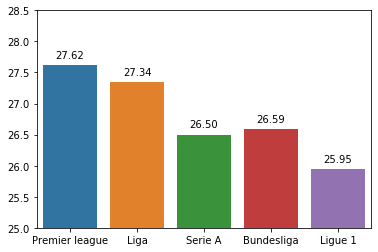

In [73]:
#mean by forward
ax = sns.barplot(x=championship, y=mean_forward)
ax.set(ylim=(25, 28.5))
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

